# Data Analysis of IPL Auction 2022

## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')

## Importing dataset

In [2]:
raw_data = pd.read_csv('ipl_2022_dataset.csv', index_col = 0)

ipl_data = raw_data.copy()

In [3]:
ipl_data.head()

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team
0,Rashid Khan,Draft Pick,BOWLER,15.0,1950.0,SRH,Gujarat Titans
1,Hardik Pandya,Draft Pick,ALL-ROUNDER,15.0,1950.0,MI,Gujarat Titans
2,Lockie Ferguson,2 Cr,BOWLER,10.0,1300.0,KKR,Gujarat Titans
3,Rahul Tewatia,40 Lakh,ALL-ROUNDER,9.0,1170.0,RR,Gujarat Titans
4,Shubman Gill,Draft Pick,BATTER,8.0,1040.0,KKR,Gujarat Titans


In [4]:
ipl_data.shape

(633, 7)

In [5]:
ipl_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 633 entries, 0 to 632
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Player           633 non-null    object 
 1   Base Price       633 non-null    object 
 2   TYPE             633 non-null    object 
 3   COST IN ₹ (CR.)  237 non-null    float64
 4   Cost IN $ (000)  237 non-null    float64
 5   2021 Squad       199 non-null    object 
 6   Team             633 non-null    object 
dtypes: float64(2), object(5)
memory usage: 39.6+ KB


In [6]:
ipl_data.isnull().sum()

Player               0
Base Price           0
TYPE                 0
COST IN ₹ (CR.)    396
Cost IN $ (000)    396
2021 Squad         434
Team                 0
dtype: int64

## Filter with null value of Cost IN column

In [7]:
ipl_data[ipl_data['Cost IN $ (000)'].isnull()]

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team
237,Suresh Raina,2 Cr,BATTER,NaN,NaN,CSK,Unsold
238,Steve Smith,2 Cr,BATTER,NaN,NaN,DC,Unsold
239,Shakib Al Hasan,2 Cr,ALL-ROUNDER,NaN,NaN,KKR,Unsold
240,Amit Mishra,1.5 Cr,BOWLER,NaN,NaN,DC,Unsold
241,Adil Rashid,2 Cr,BOWLER,NaN,NaN,PBKS,Unsold
...,...,...,...,...,...,...,...
628,Sairaj Patil,20 Lakh,BATTER,NaN,NaN,NaN,Unsold
629,Monu Singh,20 Lakh,BOWLER,NaN,NaN,NaN,Unsold
630,Nivethan Radhakrishnan,20 Lakh,BOWLER,NaN,NaN,NaN,Unsold
631,Lance Morris,20 Lakh,BOWLER,NaN,NaN,NaN,Unsold


In [8]:
ipl_data['COST IN ₹ (CR.)'] = ipl_data['COST IN ₹ (CR.)'].fillna(0)
ipl_data['Cost IN $ (000)'] = ipl_data['Cost IN $ (000)'].fillna(0)

In [9]:
ipl_data[ipl_data['2021 Squad'].isnull()]

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team
6,Yash Dayal,20 Lakh,BOWLER,3.2,416.0,NaN,Gujarat Titans
9,Abhinav Sadarangani,20 Lakh,BATTER,2.6,338.0,NaN,Gujarat Titans
10,Matthew Wade,2 Cr,WICKETKEEPER,2.4,312.0,NaN,Gujarat Titans
11,Alzarri Joseph,75 Lakh,BOWLER,2.4,312.0,NaN,Gujarat Titans
17,Varun Aaron,50 Lakh,BOWLER,0.5,65.0,NaN,Gujarat Titans
...,...,...,...,...,...,...,...
628,Sairaj Patil,20 Lakh,BATTER,0.0,0.0,NaN,Unsold
629,Monu Singh,20 Lakh,BOWLER,0.0,0.0,NaN,Unsold
630,Nivethan Radhakrishnan,20 Lakh,BOWLER,0.0,0.0,NaN,Unsold
631,Lance Morris,20 Lakh,BOWLER,0.0,0.0,NaN,Unsold


In [10]:
ipl_data['2021 Squad'] = ipl_data['2021 Squad'].fillna('Not participated')

In [11]:
ipl_data.isnull().sum()

Player             0
Base Price         0
TYPE               0
COST IN ₹ (CR.)    0
Cost IN $ (000)    0
2021 Squad         0
Team               0
dtype: int64

In [12]:
teams = ipl_data[ipl_data['COST IN ₹ (CR.)'] > 0]['Team'].unique()
teams

array(['Gujarat Titans', 'Chennai Super Kings', 'Delhi Capitals',
       'Kolkata Knight Riders', 'Punjab Kings', 'Lucknow Super Giants',
       'Mumbai Indians', 'Royal Challengers Bangalore',
       'Rajasthan Royals', 'Sunrisers Hyderabad'], dtype=object)

In [13]:
ipl_data['status'] = ipl_data['Team'].replace(teams, 'Sold')
ipl_data

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team,status
0,Rashid Khan,Draft Pick,BOWLER,15.0,1950.0,SRH,Gujarat Titans,Sold
1,Hardik Pandya,Draft Pick,ALL-ROUNDER,15.0,1950.0,MI,Gujarat Titans,Sold
2,Lockie Ferguson,2 Cr,BOWLER,10.0,1300.0,KKR,Gujarat Titans,Sold
3,Rahul Tewatia,40 Lakh,ALL-ROUNDER,9.0,1170.0,RR,Gujarat Titans,Sold
4,Shubman Gill,Draft Pick,BATTER,8.0,1040.0,KKR,Gujarat Titans,Sold
...,...,...,...,...,...,...,...,...
628,Sairaj Patil,20 Lakh,BATTER,0.0,0.0,Not participated,Unsold,Unsold
629,Monu Singh,20 Lakh,BOWLER,0.0,0.0,Not participated,Unsold,Unsold
630,Nivethan Radhakrishnan,20 Lakh,BOWLER,0.0,0.0,Not participated,Unsold,Unsold
631,Lance Morris,20 Lakh,BOWLER,0.0,0.0,Not participated,Unsold,Unsold


In [14]:
ipl_data[ipl_data['Player'].duplicated(keep=False)]

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team,status
62,Lalit Yadav,20 Lakh,ALL-ROUNDER,0.65,84.5,DC,Delhi Capitals,Sold
240,Amit Mishra,1.5 Cr,BOWLER,0.00,0.0,DC,Unsold,Unsold
499,Amit Mishra,20 Lakh,BOWLER,0.00,0.0,Not participated,Unsold,Unsold
518,Shivam Sharma,20 Lakh,ALL-ROUNDER,0.00,0.0,Not participated,Unsold,Unsold
530,Lalit Yadav,20 Lakh,BOWLER,0.00,0.0,Not participated,Unsold,Unsold
537,Shubham Singh,20 Lakh,ALL-ROUNDER,0.00,0.0,Not participated,Unsold,Unsold
544,Shubham Singh,20 Lakh,BOWLER,0.00,0.0,Not participated,Unsold,Unsold
569,Shivam Sharma,20 Lakh,ALL-ROUNDER,0.00,0.0,Not participated,Unsold,Unsold


In [15]:
# How many players have participated in IPL Auction 2022?

ipl_data.shape[0]

633

In [16]:
# How many types of players participitaed?

types = ipl_data["TYPE"].value_counts()
types.reset_index()

,index,TYPE
0,ALL-ROUNDER,242
1,BOWLER,215
2,BATTER,112
3,WICKETKEEPER,64


In [17]:
types.values

array([242, 215, 112,  64], dtype=int64)

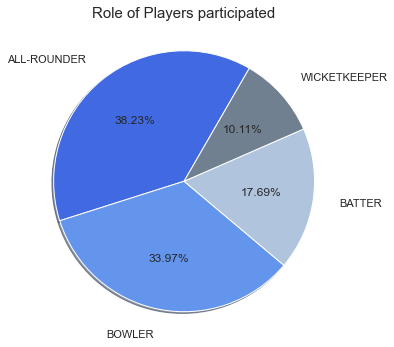

In [18]:
# Pie plot for how many types of players participitaed.

plt.pie(types.values, labels=types.index, labeldistance=1.2, autopct='%1.2f%%', 
        shadow=True, startangle=60, radius=1.5, explode = [0,0,0,0], 
        colors = ('royalblue', 'cornflowerblue', 'lightsteelblue', 'slategrey'))

plt.title('Role of Players participated', fontsize=15, pad = 55)

plt.show()

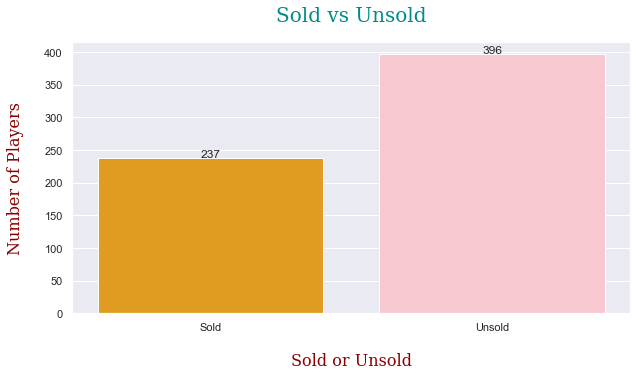

In [19]:
# Players sold and unsold using a bar graph.

plt.figure(figsize=(10,5))
fig = sns.countplot(ipl_data['status'], palette=['Orange', 'Pink'])
plt.xlabel('Sold or Unsold', labelpad = 20, loc='center', fontdict = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        })

plt.ylabel('Number of Players', labelpad = 20, fontdict = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        })
plt.title('Sold vs Unsold', fontsize=20, pad=20, fontdict = {'family': 'serif',
        'color':  'darkcyan',
        'weight': 'normal'
        })

plt.plot()

for p in fig.patches:
    fig.annotate(format(p.get_height(), '.0f'), (p.get_x() +
    p.get_width()/2., p.get_height()), ha = 'center', va = 'center',
    xytext = (0, 4), textcoords = 'offset points')

In [20]:
ipl_data.groupby('status')['Player'].count()

status
Sold      237
Unsold    396
Name: Player, dtype: int64

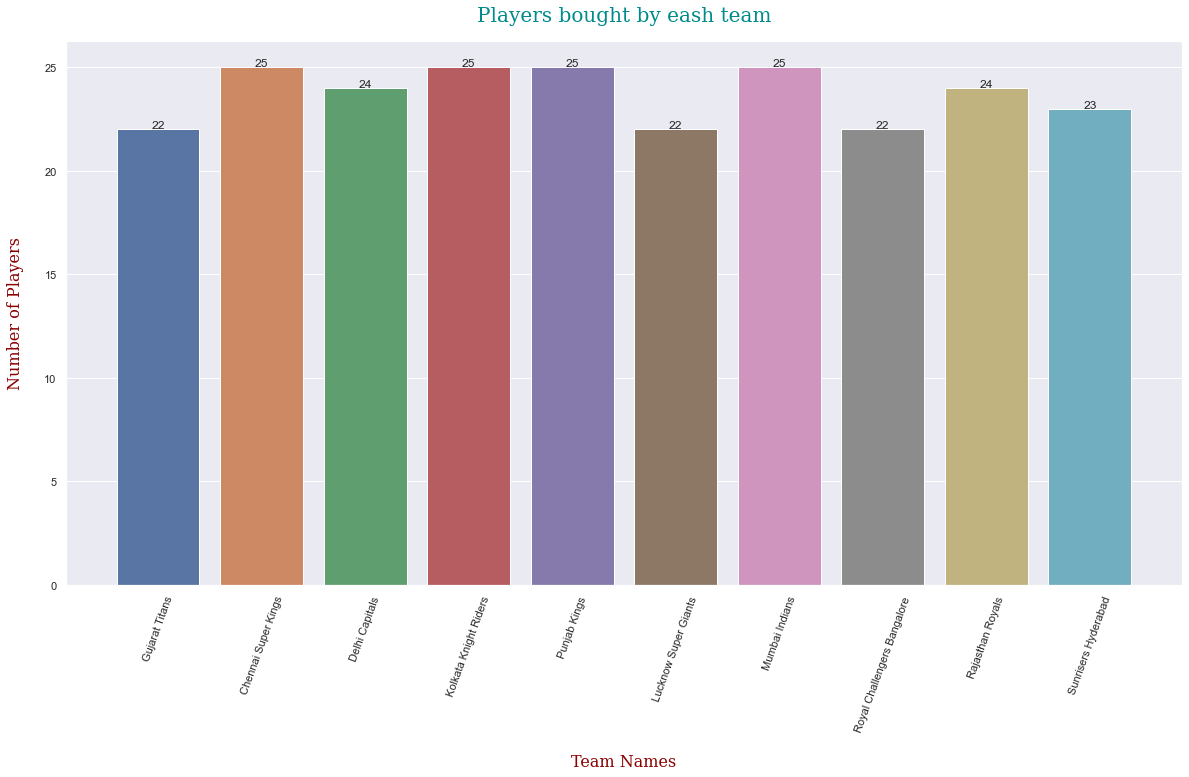

In [21]:
# Total number of players bought by each team.

plt.figure(figsize=(20,10))
fig = sns.countplot(ipl_data[ipl_data['Team'] != 'Unsold']['Team'])
plt.xlabel('Team Names', labelpad = 20, loc='center', fontdict = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        })

plt.ylabel('Number of Players', labelpad = 20, fontdict = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        })
plt.title('Players bought by eash team', fontsize=20, pad=20, fontdict = {'family': 'serif',
        'color':  'darkcyan',
        'weight': 'normal'
        })
plt.xticks(rotation=70)

plt.plot()

for p in fig.patches:
    fig.annotate(format(p.get_height(), '.0f'), (p.get_x() +
    p.get_width()/2., p.get_height()), ha = 'center', va = 'center',
    xytext = (0, 4), textcoords = 'offset points')

In [22]:
ipl_data['retention'] = ipl_data['Base Price']

In [24]:
ipl_data['retention'].replace(['2 Cr', '40 Lakh', '20 Lakh', '1 Cr', '75 Lakh', 
            '50 Lakh', '30 Lakh', '1.5 Cr'], 'From Auction', inplace = True)

In [25]:
ipl_data

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team,status,retention
0,Rashid Khan,Draft Pick,BOWLER,15.0,1950.0,SRH,Gujarat Titans,Sold,Draft Pick
1,Hardik Pandya,Draft Pick,ALL-ROUNDER,15.0,1950.0,MI,Gujarat Titans,Sold,Draft Pick
2,Lockie Ferguson,2 Cr,BOWLER,10.0,1300.0,KKR,Gujarat Titans,Sold,From Auction
3,Rahul Tewatia,40 Lakh,ALL-ROUNDER,9.0,1170.0,RR,Gujarat Titans,Sold,From Auction
4,Shubman Gill,Draft Pick,BATTER,8.0,1040.0,KKR,Gujarat Titans,Sold,Draft Pick
...,...,...,...,...,...,...,...,...,...
628,Sairaj Patil,20 Lakh,BATTER,0.0,0.0,Not participated,Unsold,Unsold,From Auction
629,Monu Singh,20 Lakh,BOWLER,0.0,0.0,Not participated,Unsold,Unsold,From Auction
630,Nivethan Radhakrishnan,20 Lakh,BOWLER,0.0,0.0,Not participated,Unsold,Unsold,From Auction
631,Lance Morris,20 Lakh,BOWLER,0.0,0.0,Not participated,Unsold,Unsold,From Auction


In [27]:
# Treating Base Price

ipl_data['Base Price'].replace('Draft Pick', 0, inplace = True)

In [29]:
ipl_data['base_price_unit'] = ipl_data['Base Price'].apply(lambda x: str(x).split(' ')[-1])

ipl_data['base_price'] = ipl_data['Base Price'].apply(lambda x: str(x).split(' ')[0])

In [32]:
ipl_data['base_price'].replace('Retained', 0, inplace = True)

In [35]:
ipl_data

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team,status,retention,base_price_unit,base_price
0,Rashid Khan,0,BOWLER,15.0,1950.0,SRH,Gujarat Titans,Sold,Draft Pick,0,0
1,Hardik Pandya,0,ALL-ROUNDER,15.0,1950.0,MI,Gujarat Titans,Sold,Draft Pick,0,0
2,Lockie Ferguson,2 Cr,BOWLER,10.0,1300.0,KKR,Gujarat Titans,Sold,From Auction,Cr,2
3,Rahul Tewatia,40 Lakh,ALL-ROUNDER,9.0,1170.0,RR,Gujarat Titans,Sold,From Auction,Lakh,40
4,Shubman Gill,0,BATTER,8.0,1040.0,KKR,Gujarat Titans,Sold,Draft Pick,0,0
...,...,...,...,...,...,...,...,...,...,...,...
628,Sairaj Patil,20 Lakh,BATTER,0.0,0.0,Not participated,Unsold,Unsold,From Auction,Lakh,20
629,Monu Singh,20 Lakh,BOWLER,0.0,0.0,Not participated,Unsold,Unsold,From Auction,Lakh,20
630,Nivethan Radhakrishnan,20 Lakh,BOWLER,0.0,0.0,Not participated,Unsold,Unsold,From Auction,Lakh,20
631,Lance Morris,20 Lakh,BOWLER,0.0,0.0,Not participated,Unsold,Unsold,From Auction,Lakh,20


In [34]:
# Total players retained and bought

ipl_data.groupby(['Team', 'retention'])['retention'].count()[:-1]

Team                         retention   
Chennai Super Kings          From Auction    21
                             Retained         4
Delhi Capitals               From Auction    20
                             Retained         4
Gujarat Titans               Draft Pick       3
                             From Auction    19
Kolkata Knight Riders        From Auction    21
                             Retained         4
Lucknow Super Giants         Draft Pick       3
                             From Auction    19
Mumbai Indians               From Auction    21
                             Retained         4
Punjab Kings                 From Auction    23
                             Retained         2
Rajasthan Royals             From Auction    21
                             Retained         3
Royal Challengers Bangalore  From Auction    19
                             Retained         3
Sunrisers Hyderabad          From Auction    20
                             Retained         

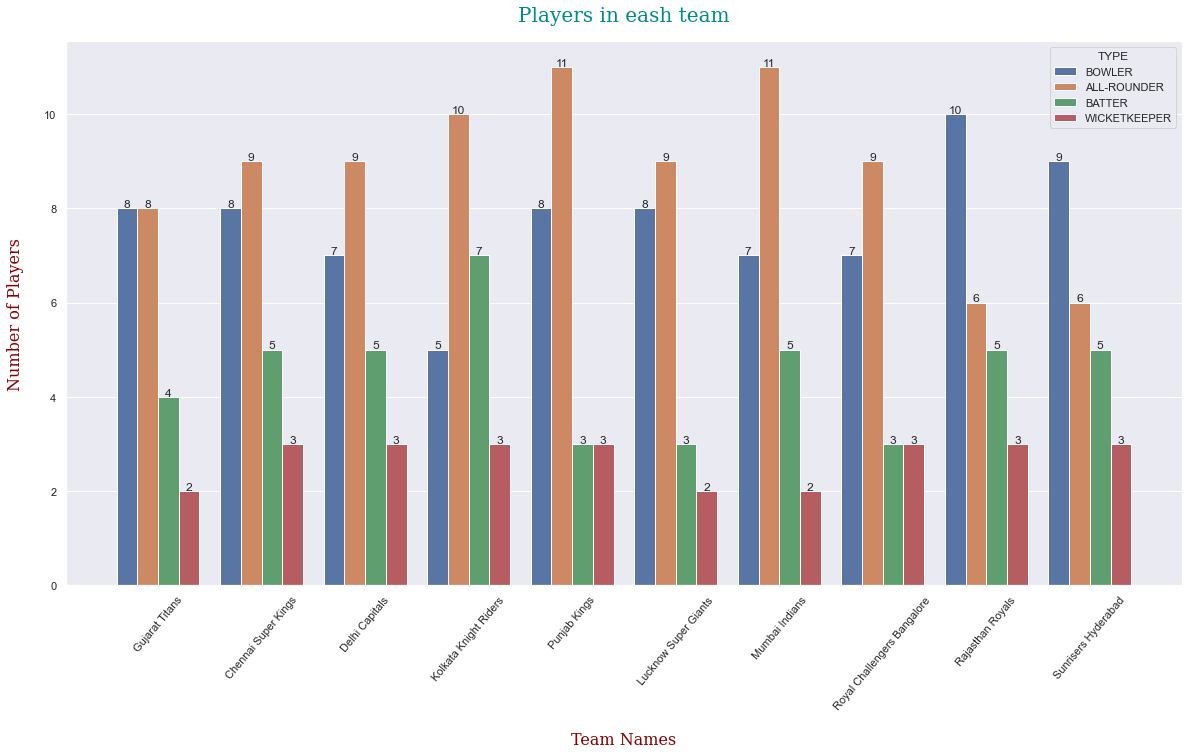

In [37]:
plt.figure(figsize=(20,10))
fig = sns.countplot(ipl_data[ipl_data['Team'] != 'Unsold']['Team'], hue = ipl_data['TYPE'])
plt.xlabel('Team Names', labelpad = 20, loc='center', fontdict = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        })

plt.ylabel('Number of Players', labelpad = 20, fontdict = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        })
plt.title('Players in eash team', fontsize=20, pad=20, fontdict = {'family': 'serif',
        'color':  'darkcyan',
        'weight': 'normal'
        })
plt.xticks(rotation=50)

plt.plot()

for p in fig.patches:
    fig.annotate(format(p.get_height(), '.0f'), (p.get_x() +
    p.get_width()/2., p.get_height()), ha = 'center', va = 'center',
    xytext = (0, 4), textcoords = 'offset points')

In [43]:
ipl_data[ipl_data['retention'] == 'From Auction'].groupby(['Team'])['COST IN ₹ (CR.)'].max()[:-1].sort_values(ascending = False)

Team
Mumbai Indians                 15.25
Chennai Super Kings            14.00
Kolkata Knight Riders          12.25
Punjab Kings                   11.50
Delhi Capitals                 10.75
Royal Challengers Bangalore    10.75
Sunrisers Hyderabad            10.75
Gujarat Titans                 10.00
Lucknow Super Giants           10.00
Rajasthan Royals               10.00
Name: COST IN ₹ (CR.), dtype: float64

In [57]:
ipl_data[ipl_data['retention'] == 'Retained'].sort_values(by = 'COST IN ₹ (CR.)', ascending = False).head(1)

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team,status,retention,base_price_unit,base_price
22,Ravindra Jadeja,Retained,ALL-ROUNDER,16.0,2080.0,CSK,Chennai Super Kings,Sold,Retained,Retained,0


In [51]:
# Top 5 Bowlers

ipl_data[(ipl_data['retention'] == 'From Auction') & (ipl_data['TYPE'] == 'BOWLER')].sort_values(by = 'COST IN ₹ (CR.)', ascending = False).head(5)

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team,status,retention,base_price_unit,base_price
23,Deepak Chahar,2 Cr,BOWLER,14.00,1820.0,CSK,Chennai Super Kings,Sold,From Auction,Cr,2
48,Shardul Thakur,2 Cr,BOWLER,10.75,1397.5,CSK,Delhi Capitals,Sold,From Auction,Cr,2
192,Prasidh Krishna,1 Cr,BOWLER,10.00,1300.0,KKR,Rajasthan Royals,Sold,From Auction,Cr,1
2,Lockie Ferguson,2 Cr,BOWLER,10.00,1300.0,KKR,Gujarat Titans,Sold,From Auction,Cr,2
122,Avesh Khan,20 Lakh,BOWLER,10.00,1300.0,DC,Lucknow Super Giants,Sold,From Auction,Lakh,20


In [53]:
# Top 5 Batsman

ipl_data[(ipl_data['retention'] == 'From Auction') & (ipl_data['TYPE'] == 'BATTER')].sort_values(by = 'COST IN ₹ (CR.)', ascending = False).head(5)

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team,status,retention,base_price_unit,base_price
71,Shreyas Iyer,2 Cr,BATTER,12.25,1592.5,DC,Kolkata Knight Riders,Sold,From Auction,Cr,2
193,Shimron Hetmyer,1.5 Cr,BATTER,8.50,1105.0,DC,Rajasthan Royals,Sold,From Auction,Cr,1.5
217,Rahul Tripathi,40 Lakh,BATTER,8.50,1105.0,KKR,Sunrisers Hyderabad,Sold,From Auction,Lakh,40
100,Shikhar Dhawan,2 Cr,BATTER,8.25,1072.5,DC,Punjab Kings,Sold,From Auction,Cr,2
195,Devdutt Padikkal,2 Cr,BATTER,7.75,1007.5,RCB,Rajasthan Royals,Sold,From Auction,Cr,2


In [55]:
# Top 5 All Rounder

ipl_data[(ipl_data['retention'] == 'From Auction') & (ipl_data['TYPE'] == 'ALL-ROUNDER')].sort_values(by = 'COST IN ₹ (CR.)', ascending = False).head(5)

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team,status,retention,base_price_unit,base_price
97,Liam Livingstone,1 Cr,ALL-ROUNDER,11.50,1495.0,RR,Punjab Kings,Sold,From Auction,Cr,1
170,Wanindu Hasaranga,1 Cr,ALL-ROUNDER,10.75,1397.5,RCB,Royal Challengers Bangalore,Sold,From Auction,Cr,1
171,Harshal Patel,2 Cr,ALL-ROUNDER,10.75,1397.5,RCB,Royal Challengers Bangalore,Sold,From Auction,Cr,2
99,Shahrukh Khan,40 Lakh,ALL-ROUNDER,9.00,1170.0,PBKS,Punjab Kings,Sold,From Auction,Lakh,40
3,Rahul Tewatia,40 Lakh,ALL-ROUNDER,9.00,1170.0,RR,Gujarat Titans,Sold,From Auction,Lakh,40


In [58]:
ipl_data = ipl_data.rename(columns = {'2021 Squad': 'Prev_Team'})

In [63]:
unsold_players = ipl_data[(ipl_data.Prev_Team != 'Not participated')
                         & (ipl_data.Team == 'Unsold')][['Player', 'Prev_Team']]

print(unsold_players)

                      Player Prev_Team
237             Suresh Raina       CSK
238              Steve Smith        DC
239          Shakib Al Hasan       KKR
240              Amit Mishra        DC
241              Adil Rashid      PBKS
242              Imran Tahir       CSK
243            Mujeeb Zadran       SRH
244               Adam Zampa       RCB
245            Rajat Patidar       RCB
246     Mohammed Azharuddeen       RCB
249             M. Siddharth        DC
252              Dawid Malan      PBKS
253              Eoin Morgan       KKR
254        Cheteshwar Pujara       CSK
255           Saurabh Tiwary        MI
257            Ishant Sharma        DC
259            Piyush Chawla        MI
260           Tabraiz Shamsi        RR
262              Sachin Baby       RCB
267              Virat Singh       SRH
269              Akash Singh        RR
273               Chris Lynn        MI
276            George Garton       RCB
288               Andrew Tye        RR
289          Sandeep Warr